# 1. 다층 퍼셉트론

### (1) 아래의 그림 중 XOR 좌표평면에서 나타나는 문제점을 서술하고 이를 해결할 방법을 제시해주세요.

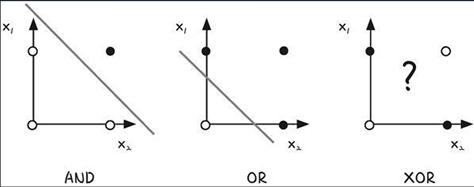

In [4]:
Image("C:/Users/User/Desktop/image01.png")

답: 직선 하나로 표현할 수 없다

### (2) 퍼셉트론에서 사용되는 다음 4개의 개념에 대해 설명하세요.

- 입력층: 입력 신호를 받는 부분
- 가중치: 은닉층에서 곱해지는 수치
- 편향: 각 뉴런이 얼마나 쉽게 활성화되는지
- 출력층: 신경망의 최종 출력을 내보내는 부분

### (3) 다층 퍼셉트론과 단틍 퍼셉트론의 차이를 설명하세요.(층의 개수에 집중하여)

답: 다층은 하나 이상의 은닉층이 있지만 단층은 없다

## (4)~(7) 지금부터 XOR 문제를 해결하는 코드를 구현해보겠습니다.

### (4) 두 개의 입력값이 배열로 주어질 때, 하나의 출력값을 가지는 단층 퍼셉트론 식을 완성해주세요.

In [4]:
import numpy as np

def MLP(x, w, b):
    z = np.dot(x, w) + b
    y = 1 / (1 + np.exp(-z))  # 시그모이드 활성화 함수 사용

    if y <= 0.5:
        return 0
    elif y > 0.5:
        return 1

### (5) AND 게이트를 만족하는 두개의 가중치와 편향값이 아래와 같이 주어졌을 때, AND 게이트를 파이썬으로 구현해주세요.

In [5]:
# 가중치와 바이어스
w1 = np.array([1, 1])
b1 = -1
 
# AND 게이트
def AND_gate(x1, x2):
    x = np.array([x1, x2])
    z = np.dot(x, w1) + b1

    if z <= 0:
        return 0
    else:
        return 1
    
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

### (6) 비슷한 방식으로 NAND 게이트와 OR 게이트도 구현해주세요.

In [7]:
# NAND 게이트
w2 = np.array([-2, -2])
b2 = 3

def NAND_gate(x1, x2):
    x = np.array([x1, x2])
    z = np.dot(x, w2) + b2

    if z <= 0:
        return 0
    else:
        return 1

NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

In [8]:
# OR 게이트
w3 = np.array([2, 2])
b3 = -1

def OR_gate(x1, x2):
    x = np.array([x1, x2])
    z = np.dot(x, w3) + b3

    if z <= 0:
        return 0
    else:
        return 1

OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

### (7) 위의 게이트들을 이용하여 XOR 게이트를 구현해주세요.

In [9]:
# XOR 게이트
def XOR_gate(x1, x2):
    s1 = NAND_gate(x1, x2)
    s2 = OR_gate(x1, x2)
    return AND_gate(s1, s2)

# XOR 게이트 테스트
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR_gate(x[0], x[1])
    print("입력 값: " + str(x) + " 출력 값: " + str(y))

입력 값: (0, 0) 출력 값: 0
입력 값: (1, 0) 출력 값: 1
입력 값: (0, 1) 출력 값: 1
입력 값: (1, 1) 출력 값: 0


# 2. 경사하강법과 기울기 소실

### (1) 경사하강법에 대해 간단히 설명해주세요.

답: 기울기를 이용해서 오차를 최소화하는 방법

### (2) 활성화 함수에 대해 간단히 설명해주세요.

답: 신경망에서 입력 신호를 변환하여 출력 값을 생성하는 함수

### (3) 시그모이드 함수를 구현하는 코드를 완성시켜주세요.

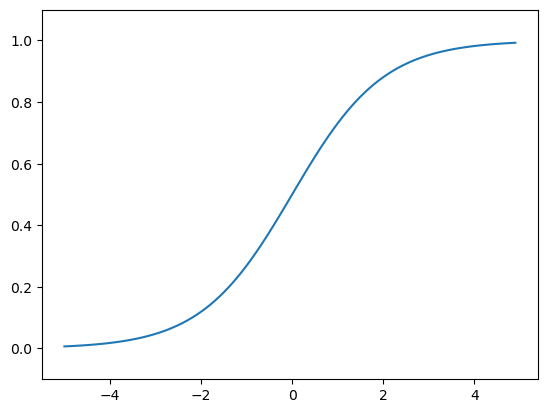

In [3]:
import matplotlib.pylab as plt
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#그래프 그러보기
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### (4) 기울기 소실 문제에 대한 설명입니다. 빈칸에 들어갈 말을 써주세요.

활성화 함수로 시그모이드 함수를 사용할 때, 시그모이드 함수의 기울기는 입력값이 __ 일 때 가장 크고 x의 절대값이 (클수록/작을수록) 작아진다. 이로 인해 역전파 과정에서 입력층으로 갈수록 기울기가 (커지는/작아지는) 현상을 기울기 소실이라고 한다.

답: 0, 작을수록, 작아지는

# 3. 과적합

### 3-1 과적합(overfiting)이란 -----에 대해 과하게 학습하여 -----에 대한 오차가 증가하는 현상을 의미한다.

답: 훈련 데이터, 정답

### 3-2 다음 중 과적합이 발생한 그림을 선택해 주세요.
- 왼쪽부터 1,2,3번

<p align="center">
  <img src="https://i.postimg.cc/9QmvNcyc/2024-01-10-135111.png"  width="750" height="200"></img>
</p>


답: 1번

# 4. 최적화
### 4-1 최적화란 ----값을 (최대화/ 최소화) 하는 파라미터를 구하는 과정이다.

답: 오차, 최소화

### 4-2 SGD(확률적 경사 하강법)은 임의로 선택한 데이터에 대해 ---를 계산하는 방법으로 (많은/적은) 데이터를 사용하므로 빠른 계산이 가능하다.

답: 기울기, 적은

### 4-3 Adam (Adaptive moment estimation)은 ---과 ----의 장점을 결합한 경사하강법이다

답: Adagrad, RMSProp

### 4-4 Adam 알고리즘 순서를 올바르게 나열해주세요.

$\eta : 학습률, \ J(\theta) : 비용함수, \ \theta : 가중치,\ t : 반복횟수 ,\ \beta_1 : first\ moment, \ \beta_1 : second\ moment$

1. $ s \leftarrow \beta_2s \ +  \ (1-\beta_2) `\ \triangledown_\theta J(\theta)\otimes \triangledown_\theta J(\theta)  $

2. $\theta \leftarrow \ \theta + \eta \hat m \oslash \sqrt {\hat s + \epsilon }$

3. $ \hat s \leftarrow\   \frac{s}{1 - \beta_2^t} $ 

4. $ m \leftarrow \beta_1m \ -  \ (1-\beta_1)\triangledown_\theta J(\theta)$

5. $ \hat m \leftarrow\   \frac{m}{1 - \beta_1^t} $

답: 4 - 1 - 5 - 3 - 2

## 5. 정규화
(early stopping, augmentation, 드롭아웃)

### 5-1. 데이터 증강(augmentation)은 학습데이터를 인위적으로 늘려 이미지 분류 모델의 성능을 향상시키는 기술으로, 주로 새 이미지를 생성하는 데 사용된다. augmentation 방식에는 무엇이 있는지 3개 이상 작성하시오. ex) crop

답: crop, rotation, flip

### 5-2. 아래의 두 그림 중 어떤 그림(왼쪽, 오른쪽)이 dropout을 나타내는지 말하고, 그림을 참고해 드롭아웃에 대해 간단히 설명하시오.

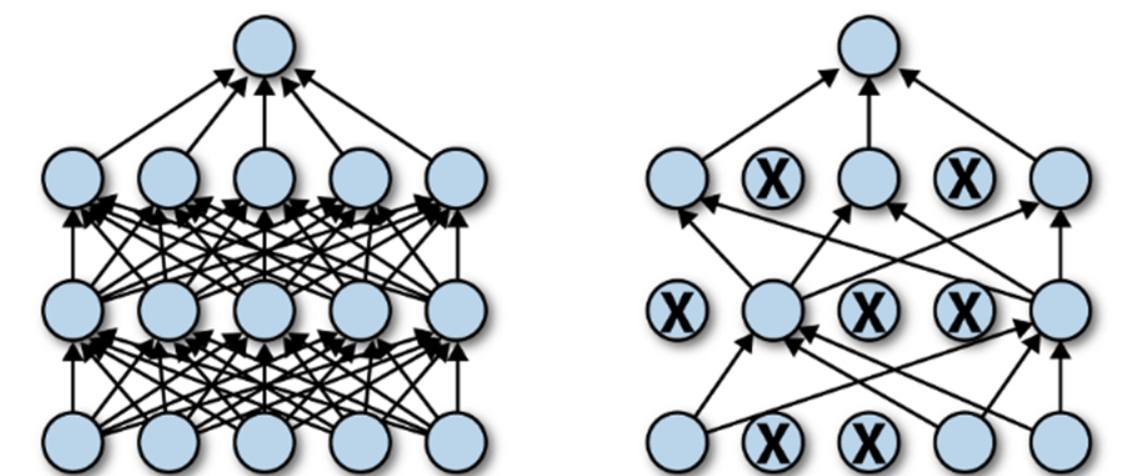

답: 신경망에서 과적합을 방지하고 모델의 일반화 성능을 향상시키기 위한 규제 기법 중 하나. 학습 중에 무작위로 선택된 일부 뉴런들을 비활성화시키는 것이 특징이다

### 5-3. early stopping은 모델이 학습 데이터에 지나치게 적응하여 검증 데이터에서의 성능이 떨어질 때 학습을 중지하는 전략이다. 아래 코드의 4가지 parameter 명을 기입하시오.

In [ ]:
EarlyStopping('''monitor'''='val_loss', '''min_delta'''=0, patience=0, '''patience'''=0, '''restore_best_weights'''='auto')

## 6. 오차역전파(Backpropagation)

### 6-1. 아래의 빈칸에 input, output, gradient 를 알맞게 채워넣으시오.
신경망의 학습을 위해서 ______를 _______에서 _______의 순서로 전달해주는 것

답 : (  input  ,  output  ,   gradient   ,)

### 6-2. 아래의 오차역전파의 동작 알고리즘을 순서대로 배치하시오.

a. 손실 함수의 그래디언트를 계산하여 각 파라미터에 대한 미분값을 구함

b. 모델에 입력 데이터를 전달하여 예측값을 계산

c.Optimizer를 사용하여 파라미터를 업데이트

d. 예측값과 실제값 간의 오차를 계산

답: b - d - a - c